# Проект: анализ интернет-магазина. А/В-тест

**Описание данных**

**Данные для первой части**

***Файл /datasets/hypothesis.csv*** 

*Hypothesis* — краткое описание гипотезы;

*Reach* — охват пользователей по 10-балльной шкале;

*Impact* — влияние на пользователей по 10-балльной шкале;

*Confidence* — уверенность в гипотезе по 10-балльной шкале;

*Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

***Файл /datasets/orders.csv***

*transactionId* — идентификатор заказа;

*visitorId* — идентификатор пользователя, совершившего заказ;

*date* — дата, когда был совершён заказ;

*revenue* — выручка заказа;

*group* — группа A/B-теста, в которую попал заказ.

***Файл /datasets/visitors.csv***

*date* — дата;

*group* — группа A/B-теста;

*visitors* — количество пользователей в указанную дату в указанной группе A/B-теста

**Описание проекта**

***Контекст***

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

***Часть 1. Приоритизация гипотез.***

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

***Задача***

-Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

-Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

-Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

***Часть 2. Анализ A/B-теста***

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

***Задача***

Проанализируйте A/B-тест:

-Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

-Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

-Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

-Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

-Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

-Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

-Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

-Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

-Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

-Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

-Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

-Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

-Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

-Примите решение по результатам теста и объясните его. Варианты решений:
1.Остановить тест, зафиксировать победу одной из групп.
2.Остановить тест, зафиксировать отсутствие различий между группами.
3.Продолжить тест.

### Загрузка данных и подготовка к анализу

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats as st


In [2]:
# Открываем файлы и сохраняем их в переменных
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

#### Таблица hypothesis

In [3]:
# Увеличим ширину столбца
pd.set_option('max_colwidth', 120)
# Выводим на экран таблицу hypothesis
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# Посмотрим общую информацию о таблице hypothesis
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


***На основе полученных данных можно отметить, что:***

В целом, с данными в таблице hypothesis все в порядке. Можно для удобства привести названия столбцов к нижнему регистру.

In [5]:
# Приведем названия столбцов в таблице hypothesis к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

#### Таблица orders

In [6]:
# Выводим на экран таблицу orders
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
# Посмотрим общую информацию о таблице orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
# Проверим таблицу orders на количество дубликатов
orders.duplicated().sum()

0

***На основе полученных данных можно отметить, что:***

В таблице orders стоит привести названия к змеиному_регистру.

В колонке date должен быть тип данных datetime.



In [9]:
# Приведем названия столбцов в таблице orders к единому стилю
orders = orders.rename(columns={'transactionId': 'transaction_id',
                                'visitorId': 'visitor_id'})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [10]:
# Изменим тип данных в таблице orders в столбце date
orders['date'] = pd.to_datetime(orders['date'])
# Выполним проверку
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


#### Таблица visitors

In [11]:
# Выводим на экран таблицу visitors
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [12]:
# Посмотрим общую информацию о таблице visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
# Проверим таблицу visitors на количество дубликатов
visitors.duplicated().sum()

0

***На основе полученных данных можно отметить, что:***

В колонке date должен быть тип данных datetime.

In [14]:
# Изменим тип данных в таблице visitors в столбце date
visitors['date'] = pd.to_datetime(visitors['date'])
# Выполним проверку
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


#### Вывод

После предобработки данных в таблицах hypothesis, orders и visitors все названия столбцов приведены к единому стилю, а типы данных преобразованы в правильные. Дубликаты в таблице отсутсвуют. Данные готовы к анализу.


### Часть 1. Приоритизация гипотез

#### Применение фреймворка ICE для приоритизации гипотез. 

In [15]:
# Добавим столбец ICE для приоритизации гипотез
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)

In [16]:
# Увеличим ширину столбца
pd.set_option('max_colwidth', 120)
# Отсортируем гипотезы по ICE по убыванию приоритета и выведем на экран.
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


#### Применение фреймворка RICE для приоритизации гипотез. 

In [17]:
# Добавим столбец RICE для приоритизации гипотез
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)

In [18]:
# Увеличим ширину столбца
pd.set_option('max_colwidth', 120)
# Отсортируем гипотезы по RICE по убыванию приоритета и выведем на экран.
hypothesis[['hypothesis', 'RICE', 'reach']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE,reach
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,8
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,1
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,3


#### Вывод

Различия в таблицах с ICE и RICE есть, но присутствуют и схожие моменты.

В ICE мы видим, что в пятерку лидеров входят гипотезы с индексами 8, 0, 7, 6, 2. В RICE - 7, 2, 0, 6, 8. То есть, можно сделать вывод, что гипотезы с номерами индексов 8, 7, 6, 2, 0 являются весьма приоритетными и по ICE, и по RICE. Но стоит обратить внимание, что в RICE есть параметр reach, который учитывает какое количество пользователей затронет изменение. Чем выше этот параметр, тем гипотеза приоритетнее. Мы видим, что в гипотезе с индексом 7 ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок") параметр reach составляет целых 10 баллов, далее идет гипотеза с индексом 2 ("Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа") с reach, равным 8. Также можно заметить, что в гипотезе с индексом 3 ("Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар") параметр reach составляет 8 баллов, однако, эта гипотеза находится только на 6 месте. 

Гипотезы с индексом 1 ("Запустить собственную службу доставки, что сократит срок доставки заказов"), 5 ("Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"), 3 ("Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар") и особенно 4 ("Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей") являются низкими по приоритету в обоих случаях.

Исходя из всего вышесказанного, я думаю, что в первую очередь стоит обратить внимание на тестирование гипотез под номерами индексов 7 ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"), 2 ("Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"),  0 ("Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"). Также, возможно, в дальнейшем стоит присмотреться к гипотезам с индексами 6 ("Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию") и 8 ("Запустить акцию, дающую скидку на товар в день рождения"). 

### Часть 2. Анализ A/B-теста

#### Построение графика кумулятивной выручки по группам


In [19]:
# Выведем на экран таблицы orders и visitors
display(orders.head(5))
visitors.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [20]:
# Создадим две группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# Получим id пользователей, попавших в обе группы 
group_a_and_b=list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))
len(group_a_and_b)

58

Мы узнали, что 58 пользователей попадают в обе группы.

In [21]:
# Cоздаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


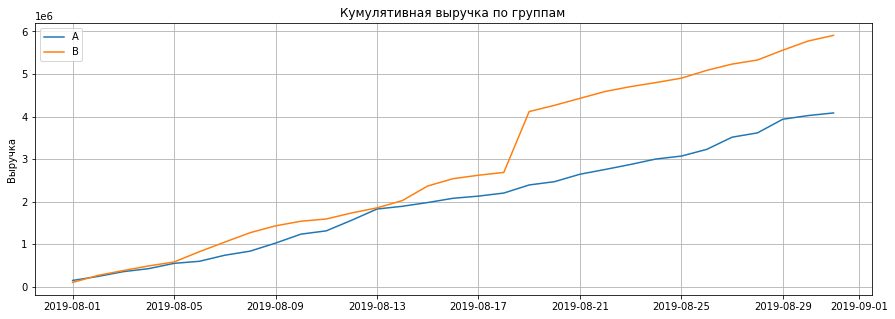

In [22]:
# Создаем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# Создаем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# Задаем размер графика
plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.ylabel('Выручка')
plt.grid()
plt.legend()

***На основе полученных данных можно отметить, что:***

Выручка все время растет для обеих групп. В период с 01.08.2019 по 05.08.2019 выручка была практически одинаковой и в группе А, и в группе В.

Примерно 18.08.2019 у группы В произошел резкий рост выручки, наверняка это было с чем-то связано, например с большим количеством заказов или с заказами с высокой стоимостью.

Также можно отметить, что в группе В выручка практически все время выше, чем в группе А.

#### Построение графика кумулятивного среднего чека по группам

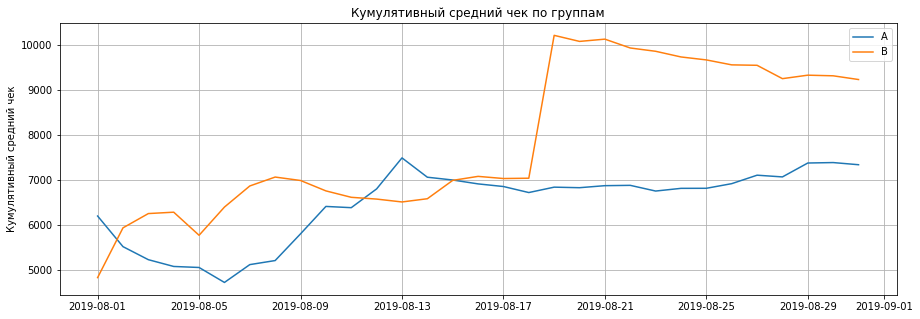

In [23]:
# Задаем размер графика
plt.figure(figsize=(15,5))
# Строим график кумулятивного среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
# Строим график кумулятивного среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Кумулятивный cредний чек')
plt.grid()
plt.legend()

***На основе полученных данных можно отметить, что:***

Кумулятивный cредний чек для обеих групп то рос, то падал, то снова рос. 

У группы В мы снова видим резкий рост 18.08.2019, соответственно, скорее всего в этот день в группе В случился один или несколько крупных заказов. После чего на графике заметно небольшое падение среднего чека.

Также мы видим, что у группы В средний чек, в целом, выше, чем в группе А. Однако 01.08.2019 и 13.08.2019, средний чек в группе А был несколько выше, чем в группе В.

Рост для группы А более равномерный, чем для группы В. Начиная с 18.08.2019 мы видим очень плавный рост.

#### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

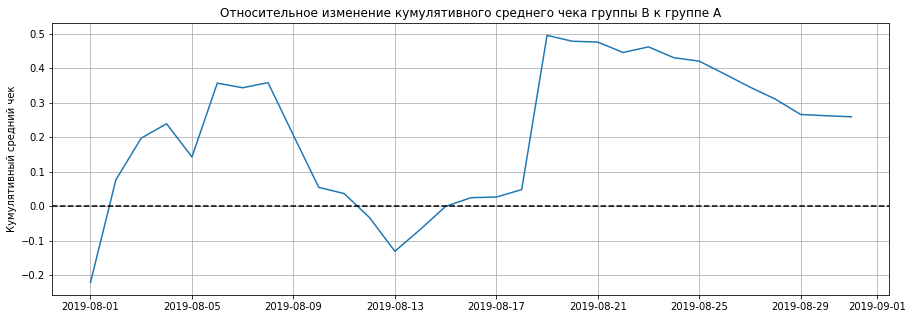

In [24]:
# Собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# Задаем размер графика
plt.figure(figsize=(15,5))
# Строим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('Кумулятивный cредний чек')
plt.grid()

***На основе полученных данных можно отметить, что:***

В нескольких точках график различия между сегментами резко «скачет». Возможно, где-то спрятались крупные заказы и выбросы.

В целом, мы видим рост с 01.08.2019 до 08.08.2019. Далее идет спад до 13.08.2019. Как раз в период с 12.08.2019 по 14.08.2019 средний чек для группы А выше, чем для группы В. Далее идет рост, причем мы снова видим резкий скачок роста 18.08.2019. Далее средний чек постепенно снижается.

#### Построение графика кумулятивного среднего количества заказов на посетителя по группам

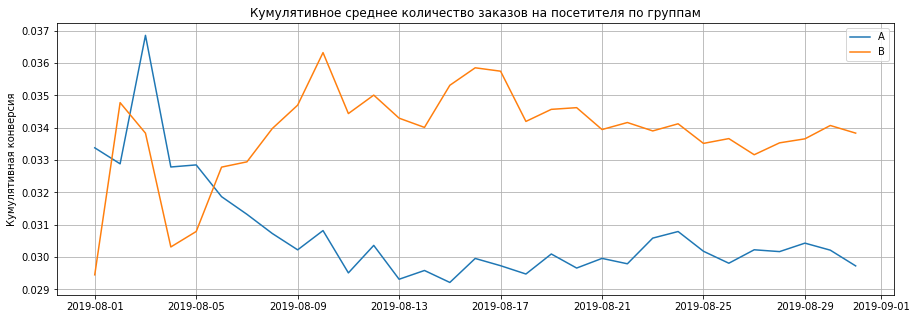

In [25]:
# Считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# Отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# Отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# Задаем размер графика
plt.figure(figsize=(15,5))
# Строим график
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.ylabel('Кумулятивная конверсия')
plt.grid()

***На основе полученных данных можно отметить, что:***

Мы видим, что 01.08.2019 и в период с 03.08.2019 по 05.08.2019 конверсия для группы А была выше, чем для группы В. Причем 03.08.2019 конверсия была самой высокой за весь исследуемый период. 

С 06.08.2019 все меняется и конверсия группы А идет вниз с дальнейшим выравниманием и небольшими колебаниями, а конверсия группы В, наоборот, идет вверх, но в дальнейшем также выравнивается. В целом, конверсия группы В выше, чем конверсия группы А.

#### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

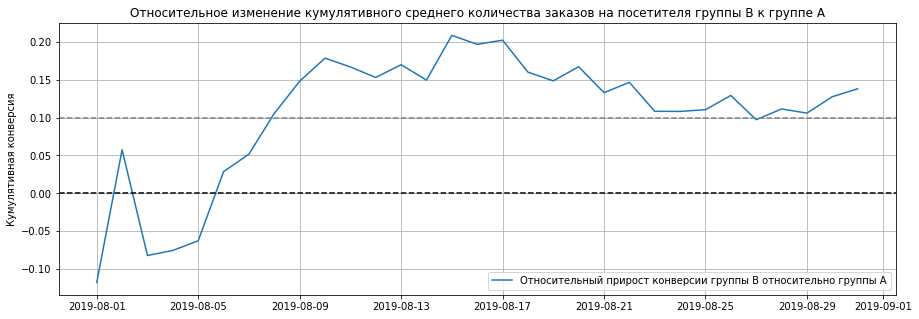

In [26]:
# Собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# Задаем размер графика
plt.figure(figsize=(15,5))
# Строим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Кумулятивная конверсия')
plt.grid()

***На основе полученных данных можно отметить, что:***

Пик конверсии составляет 21% и приходится на 15.08.2019.

Мы видим, что 01.08.2019 и в период с 03.08.2019 по 06.08.2019 конверсия группы А была выше. Далее, начиная с 06.08.2019 конверсия группы В начинает свой рост с дальнейшим выравниваем. 

#### Построение точечного графика количества заказов по пользователям

In [27]:
# Подсчитаем количество заказов по пользователям и посмотрим на результат
ordersByUsers = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
ordersByUsers.columns = ['visitor_id', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


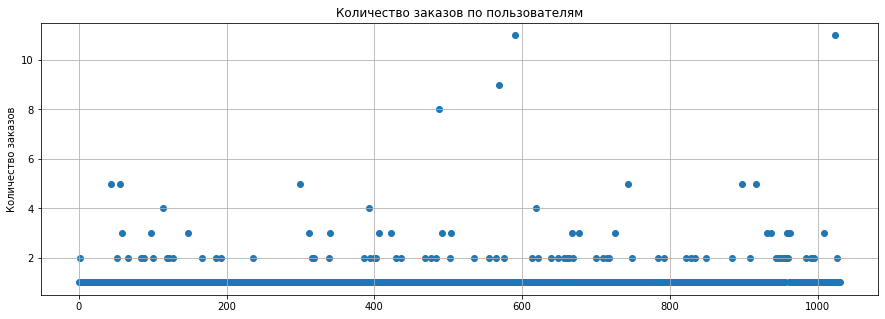

In [28]:
# Построим точечный график числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
# Задаем размер графика
plt.figure(figsize=(15,5))
# Строим график
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')
plt.grid()

***На основе полученных данных можно отметить, что:***

Самое большое количество пользователей соврешает по 1 заказу. Гораздо реже пользователи совершают 2, 3, 4 и 5 заказов.

Также мы видим явные аномалии: есть единичные пользователи, которые сделали 8, 9 и 11 заказов.


#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [29]:
# Рассчитаем 95 и 99 перцентили по заказам
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

In [30]:
# Рассчитаем 95-99 перцентили по заказам
np.percentile(ordersByUsers['orders'], [95, 96, 97, 98, 99])

array([2., 2., 2., 3., 4.])

***На основе полученных данных можно отметить, что:***

Чаще всего пользователи совершали 1 или 2 заказа. Лишь 1% пользователей совершали 4 заказа и 2% - 3 заказа. Следовательно, значения выше 2 заказов можно отсечь.

#### Построение точечного графика стоимостей заказов

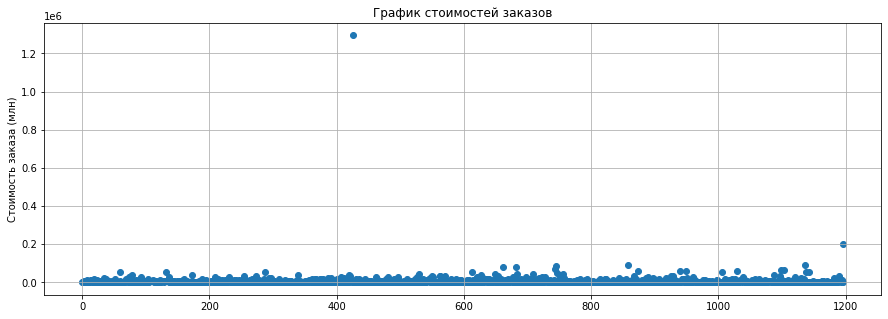

In [31]:
# Построим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
# Задаем размер графика
plt.figure(figsize=(15,5))
# Строим график
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказа (млн)')
plt.grid()

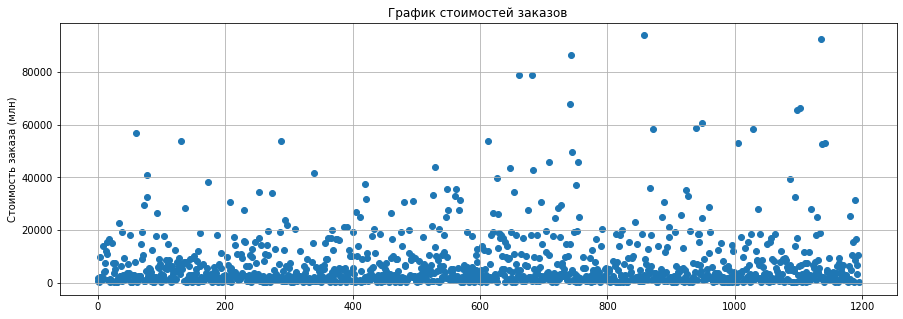

In [32]:
# Уберем из графика выбросы и аномалии
orders_without_anomaly = orders[orders['revenue']<=200000]['revenue']
x_values_2 = pd.Series(range(0,len(orders_without_anomaly)))
# Задаем размер графика
plt.figure(figsize=(15,5))
# Строим график
plt.scatter(x_values_2, orders_without_anomaly)
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказа (млн)')
plt.grid()

***На основе полученных данных можно отметить, что:***

У нас были аномальные заказы на сумму свыше 1.2 млн, а так же 200 тыс., которые мы убрали из графика. Теперь мы видим, что остались заказы, не превышающие сумму в 100 тыс.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [33]:
# Рассчитаем 95 и 99 перцентили по заказам
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

In [34]:
# Рассчитаем 95-99 перцентили по заказам
np.percentile(orders['revenue'], [95, 96, 97, 98, 99])

array([28000. , 31382. , 35485. , 44133.2, 58233.2])

***На основе полученных данных можно отметить, что:***

Лишь 1% пользователей совершает заказы на сумму 58233,2. 5% пользователей совершают заказы на сумму 28 тыс. Думаю, заказы на сумму свыше 28.000 можно отсечь.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [35]:
# Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть
# Начнём с подготовки данных
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1,)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby('date', as_index=False).agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1,).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA',]

ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby('date', as_index=False).agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1,).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB',]
# Объединим все данные в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [36]:
# Создадим переменные, где укажем число совершенных заказов для пользователей, которые заказывали хотя бы 1 раз
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
ordersByUsersB.columns = ['visitor_id', 'orders'] 

# Передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам. Нули для пользователей, которые ничего не заказывали
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# Зададим уровень значимости 5%
alpha=0.05

display("p-value = {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
display("Относительный показатель группы B к А = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'p-value = 0.017'

'Относительный показатель группы B к А = 0.138'

***На основе полученных данных можно отметить, что:***

По «сырым» данным различия в среднем числе заказов групп A и B есть. Р-value составляет 0.017, что меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.

Относительный выигрыш группы B равен 13,8%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [37]:
# Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть 
# Зададим уровень значимости 5%
alpha=0.05
# Найдём относительные различия в среднем чеке между группами
display("p-value = {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display("Относительный показатель группы B к А = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

'p-value = 0.729'

'Относительный показатель группы B к А = 0.259'

***На основе полученных данных можно отметить, что:***

P-value составляет 0,729, это больше 0.05. Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. 

И при этом мы средний чек группы B на 25,9% выше среднего чека группы A. Если p-value больше alpha, средний чек группы B равен среднему чеку группы A. Значит, что скорее всего такие различия получены случайным образом, из-за наличия аномалий, над которыми нужно поработать. 

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 28 000 рублей. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [38]:
# Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],], axis=0,)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64

74

***На основе полученных данных можно отметить, что:***

У нас есть 74 аномальных пользователя.

In [39]:
# Узнаем, как действия аномальных пользователей повлияли на результаты теста. 
# Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 
# Сначала подготовим выборки количества заказов по пользователям по группам теста:

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders',) ,], axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders',), ], axis=0,) 

# Применим статистический критерий Манна-Уитни к полученным выборкам
# Зададим уровень значимости 5%
alpha=0.05
display("p-value = {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display("Относительный показатель группы B к А = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))     

'p-value = 0.013'

'Относительный показатель группы B к А = 0.173'

***На основе полученных данных можно отметить, что:***

Сильных изменений не произошло. P-value составляет 0,013, что меньше, чем 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.

Относительный выигрыш группы B равен 17,3% (с "сырыми" данными было 13,8%).

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [40]:
# Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть 
# Посмотрим, произошло ли что-нибудь с результатами по среднему чеку.
# Зададим уровень значимости 5%
alpha=0.05
display("p-value = {0:.3f}".format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'], orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'],)[1]))

display("Относительный показатель группы B к А = {0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)), )]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'].mean() - 1)) 

'p-value = 0.738'

'Относительный показатель группы B к А = -0.020'

***На основе полученных данных можно отметить, что:***

P-value составляет 0,738, что больше 0.05. Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия.

Далее идут изменения: если в случае с "сырыми" данными средний чек группы B был на 25,9% выше среднего чека группы A (что явно было из-за аномалии), то теперь все наоборот: средний чек группы А на 2% выше! Следовательно, на средний чек до этого точно влияли "аномальные" данные и вбросы, которые мы убрали в дальнейшем.

### Вывод

**-При построении кумулятивных графиков мы выяснили, что:**

1.Выручка для обеих групп все время растет с небольшими перепадами. При этом выручка в группе В практически подавляющее большинство дней в рассматриваемом периоде выше, чем в группе А. А вот рост для группы А более равномерный, чем для группы В.

2.18.08.2019 в группе В произошел аномально высокий по сумме заказ.

3.Кумулятивный cредний чек для обеих групп то рос, то падал, то снова рос, следовательно, рост был неравномерным.

**-При построении точечных графиков мы выяснили, что:**

1.Самое большое количество пользователей соврешает по 1 заказу. Гораздо реже пользователи совершают более 2 заказов. Хотя были и аномальные единичные случаи с 8,9,11 заказами.

2.Сразу были заметны аномальные заказы на сумму свыше 1.2 млн, а так же 200 тыс., которые мы убрали из графика. 

**-При посчете статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» и "очищенным" данным мы выяснили, что:**

1.Мы нашли 74 аномальных пользователя.

2.И по «сырым», и по "очищенным" данным различия в среднем числе заказов групп A и B есть. В "сырых" данных Р-value составляет 0.017, в "очищенных" - 0,013 - разница небольшая. Нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы отвергли, так как различия есть. 

3.Относительный выигрыш группы B в "очищенных" данных равен 17,3% (с "сырыми" данными было 13,8%).

**-При посчете статистической значимости различий в среднем чеке заказа между группами по «сырым» и "очищенным" данным мы выяснили, что:**

1.Нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, так как р-value в "сырых" данных составляет 0,729, а в "очищенных" - 0,738, что больше 0.05.

2.Далее мы увидели изменения: если в случае с "сырыми" данными средний чек группы B был на 25,9% выше среднего чека группы A, то теперь все наоборот: средний чек группы А на 2% выше! Следовательно, на средний чек до этого влияли "аномальные" данные и вбросы, которые мы убрали в дальнейшем. На самом деле средний чек группы В вмего на 2% ниже, чем у группы А, что не считается  большой разницей.

**Исходя из всех выводов, я считаю, что следует остановить тест и зафиксировать победу за группой В, так как показатели в этой группе, в целом выше, чем в группе А.**